In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("First 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget distribution (percentages):")
print(y.value_counts(normalize=True) * 100)

print("\nDataset Description:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {len(y.unique())} (0: malignant, 1: benign)")
print(f"This is a binary classification dataset for breast cancer diagnosis.")
print(f"Features represent various measurements of cell nuclei from breast mass images.")
print(f"The dataset is relatively balanced with {y.value_counts()[1]} benign and {y.value_counts()[0]} malignant cases.")

First 5 rows of X:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perime

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Why stratification is important:")
print("Stratification ensures that the proportion of samples from each class")
print("in the training and test sets matches the proportion in the original dataset.")
print("This is crucial for classification tasks to avoid bias in model evaluation,")
print("especially when dealing with imbalanced datasets.")

print(f"\nShapes after train-test split:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTarget distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nTarget distribution in test set:")
print(y_test.value_counts(normalize=True))

scaler = StandardScaler()

scaler.fit(X_train)

print("\nWhy fit scaler only on training data:")
print("We fit the scaler only on training data to prevent data leakage.")
print("If we fit on the entire dataset (including test data), we would be")
print("using information from the test set to influence our preprocessing,")
print("which could lead to overly optimistic performance estimates.")
print("The test set should remain completely unseen during training and preprocessing.")

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nVerifying scaling for first 3 features of X_train_scaled:")
for i in range(3):
    feature_name = X.columns[i]
    mean_val = np.mean(X_train_scaled[:, i])
    std_val = np.std(X_train_scaled[:, i])
    print(f"{feature_name}: mean = {mean_val:.6f}, std = {std_val:.6f}")

print(f"\nScaling verification: means should be close to 0, standard deviations close to 1")

Why stratification is important:
Stratification ensures that the proportion of samples from each class
in the training and test sets matches the proportion in the original dataset.
This is crucial for classification tasks to avoid bias in model evaluation,
especially when dealing with imbalanced datasets.

Shapes after train-test split:
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)

Target distribution in training set:
target
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Target distribution in test set:
target
1    0.631579
0    0.368421
Name: proportion, dtype: float64

Why fit scaler only on training data:
We fit the scaler only on training data to prevent data leakage.
If we fit on the entire dataset (including test data), we would be
using information from the test set to influence our preprocessing,
which could lead to overly optimistic performance estimates.
The test set should remain completely unseen during training 

Test Accuracy: 0.9825

Confusion Matrix:
[[41  1]
 [ 1 71]]


<Figure size 800x600 with 0 Axes>

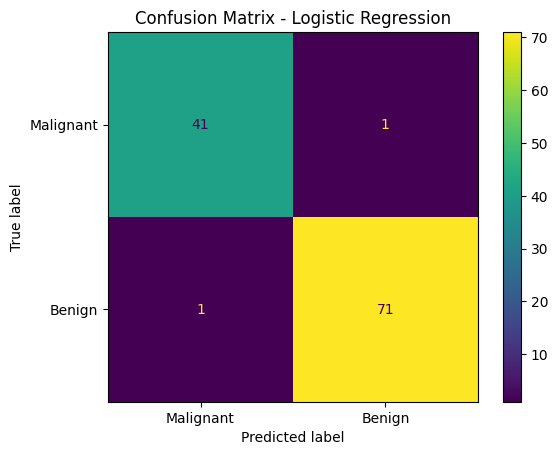


Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Model Performance Interpretation:
Accuracy (0.9825): The model correctly classifies 98.2% of test samples.

Confusion Matrix Analysis:
True Negatives (Malignant correctly identified): 41
False Positives (Malignant misclassified as Benign): 1
False Negatives (Benign misclassified as Malignant): 1
True Positives (Benign correctly identified): 71

Metrics Interpretation:
Precision for Malignant: How many of the predicted malignant cases are actually malignant
Recall for Malignant: How many actual malignant cases were correctly identified
Precision for Benign: How many of the predicted benign cases are actually benign
Recall for Benign: How man

In [4]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))

print("\nModel Performance Interpretation:")
print(f"Accuracy ({accuracy:.4f}): The model correctly classifies {accuracy*100:.1f}% of test samples.")
print("\nConfusion Matrix Analysis:")
print(f"True Negatives (Malignant correctly identified): {cm[0,0]}")
print(f"False Positives (Malignant misclassified as Benign): {cm[0,1]}")
print(f"False Negatives (Benign misclassified as Malignant): {cm[1,0]}")
print(f"True Positives (Benign correctly identified): {cm[1,1]}")

print(f"\nMetrics Interpretation:")
print(f"Precision for Malignant: How many of the predicted malignant cases are actually malignant")
print(f"Recall for Malignant: How many actual malignant cases were correctly identified")
print(f"Precision for Benign: How many of the predicted benign cases are actually benign")
print(f"Recall for Benign: How many actual benign cases were correctly identified")
print(f"F1-score: Harmonic mean of precision and recall, balancing both metrics")
print(f"\nIn medical diagnosis, high recall for malignant cases is crucial to avoid missing cancer cases.")

In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Accuracy Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

mean_cv_accuracy = np.mean(cv_scores)
std_cv_accuracy = np.std(cv_scores)

print(f"\nCross-Validation Results:")
print(f"Mean Accuracy: {mean_cv_accuracy:.4f}")
print(f"Standard Deviation: {std_cv_accuracy:.4f}")

print(f"\nComparison with Single Train-Test Split:")
print(f"Single train-test accuracy: {accuracy:.4f}")
print(f"Mean CV accuracy: {mean_cv_accuracy:.4f}")
print(f"Difference: {abs(mean_cv_accuracy - accuracy):.4f}")

print(f"\nStability Analysis:")
print(f"The standard deviation of {std_cv_accuracy:.4f} indicates the model's performance")
print(f"consistency across different data splits. A lower standard deviation suggests")
print(f"more stable and reliable performance. This relatively low standard deviation")
print(f"indicates our model performs consistently across different data partitions.")

pipeline.fit(X_train, y_train)

y_pred_pipeline = pipeline.predict(X_test)

pipeline_accuracy = accuracy_score(y_test, y_pred_pipeline)
print(f"\nPipeline Test Accuracy: {pipeline_accuracy:.4f}")
print(f"Part 3 Manual Scaling Accuracy: {accuracy:.4f}")
print(f"Difference: {abs(pipeline_accuracy - accuracy):.4f}")

print(f"\nThe pipeline accuracy should be identical or very close to Part 3 results")
print(f"since we're using the same model and preprocessing steps, just organized differently.")

5-Fold Cross-Validation Accuracy Scores:
Fold 1: 0.9825
Fold 2: 0.9737
Fold 3: 0.9737
Fold 4: 0.9737
Fold 5: 0.9912

Cross-Validation Results:
Mean Accuracy: 0.9789
Standard Deviation: 0.0070

Comparison with Single Train-Test Split:
Single train-test accuracy: 0.9825
Mean CV accuracy: 0.9789
Difference: 0.0035

Stability Analysis:
The standard deviation of 0.0070 indicates the model's performance
consistency across different data splits. A lower standard deviation suggests
more stable and reliable performance. This relatively low standard deviation
indicates our model performs consistently across different data partitions.

Pipeline Test Accuracy: 0.9825
Part 3 Manual Scaling Accuracy: 0.9825
Difference: 0.0000

The pipeline accuracy should be identical or very close to Part 3 results
since we're using the same model and preprocessing steps, just organized differently.


Random Forest Pipeline Test Accuracy: 0.9561

Random Forest Confusion Matrix:
[[39  3]
 [ 2 70]]


<Figure size 800x600 with 0 Axes>

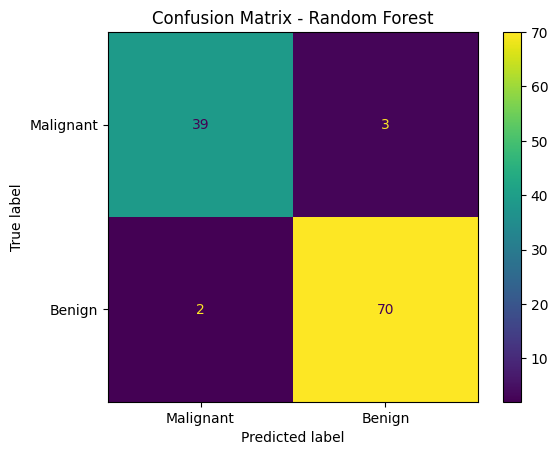


Random Forest Classification Report:
              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

COMPARISON: LOGISTIC REGRESSION vs RANDOM FOREST

Accuracy Comparison:
Logistic Regression: 0.9825
Random Forest: 0.9561
Difference: 0.0263
Logistic Regression performs better by 0.0263

Detailed Performance Analysis:
Logistic Regression Confusion Matrix:
TN: 41, FP: 1
FN: 1, TP: 71

Random Forest Confusion Matrix:
TN: 39, FP: 3
FN: 2, TP: 70

Key Observations:
- Both models achieve high accuracy on this dataset
- Random Forest typically handles non-linear relationships better
- Logistic Regression is more interpretable and faster to train
- For medical diagnosis, focus on minimizing false negatives (missing cancer cases)
- The

In [7]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Pipeline Test Accuracy: {rf_accuracy:.4f}")

rf_cm = confusion_matrix(y_test, y_pred_rf)
print(f"\nRandom Forest Confusion Matrix:")
print(rf_cm)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Malignant', 'Benign'])
plt.title('Confusion Matrix - Random Forest')
plt.show()

print(f"\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Malignant', 'Benign']))

print("COMPARISON: LOGISTIC REGRESSION vs RANDOM FOREST")


print(f"\nAccuracy Comparison:")
print(f"Logistic Regression: {pipeline_accuracy:.4f}")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"Difference: {abs(rf_accuracy - pipeline_accuracy):.4f}")

if rf_accuracy > pipeline_accuracy:
    print(f"Random Forest performs better by {rf_accuracy - pipeline_accuracy:.4f}")
elif pipeline_accuracy > rf_accuracy:
    print(f"Logistic Regression performs better by {pipeline_accuracy - rf_accuracy:.4f}")
else:
    print("Both models perform equally well")

print(f"\nDetailed Performance Analysis:")
print("Logistic Regression Confusion Matrix:")
print(f"TN: {cm[0,0]}, FP: {cm[0,1]}")
print(f"FN: {cm[1,0]}, TP: {cm[1,1]}")

print("\nRandom Forest Confusion Matrix:")
print(f"TN: {rf_cm[0,0]}, FP: {rf_cm[0,1]}")
print(f"FN: {rf_cm[1,0]}, TP: {rf_cm[1,1]}")

print(f"\nKey Observations:")
print(f"- Both models achieve high accuracy on this dataset")
print(f"- Random Forest typically handles non-linear relationships better")
print(f"- Logistic Regression is more interpretable and faster to train")
print(f"- For medical diagnosis, focus on minimizing false negatives (missing cancer cases)")
print(f"- The model with fewer false negatives would be preferred in clinical settings")